In [180]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [181]:
ms= pd.read_csv("mashrooms.csv")

In [182]:
ms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [183]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [184]:
ms["class"].unique()

array(['p', 'e'], dtype=object)

In [185]:
ms["class"] = [1 if i == "p" else 0 for i in ms["class"]]
ms.drop("veil-type",axis=1,inplace=True)

In [186]:
for column in ms.drop(["class"], axis=1).columns:
    value = 0
    step = 1/(len(ms[column].unique())-1)
    for i in ms[column].unique():
        ms[column] = [value if letter == i else letter for letter in ms[column]]
        value += step

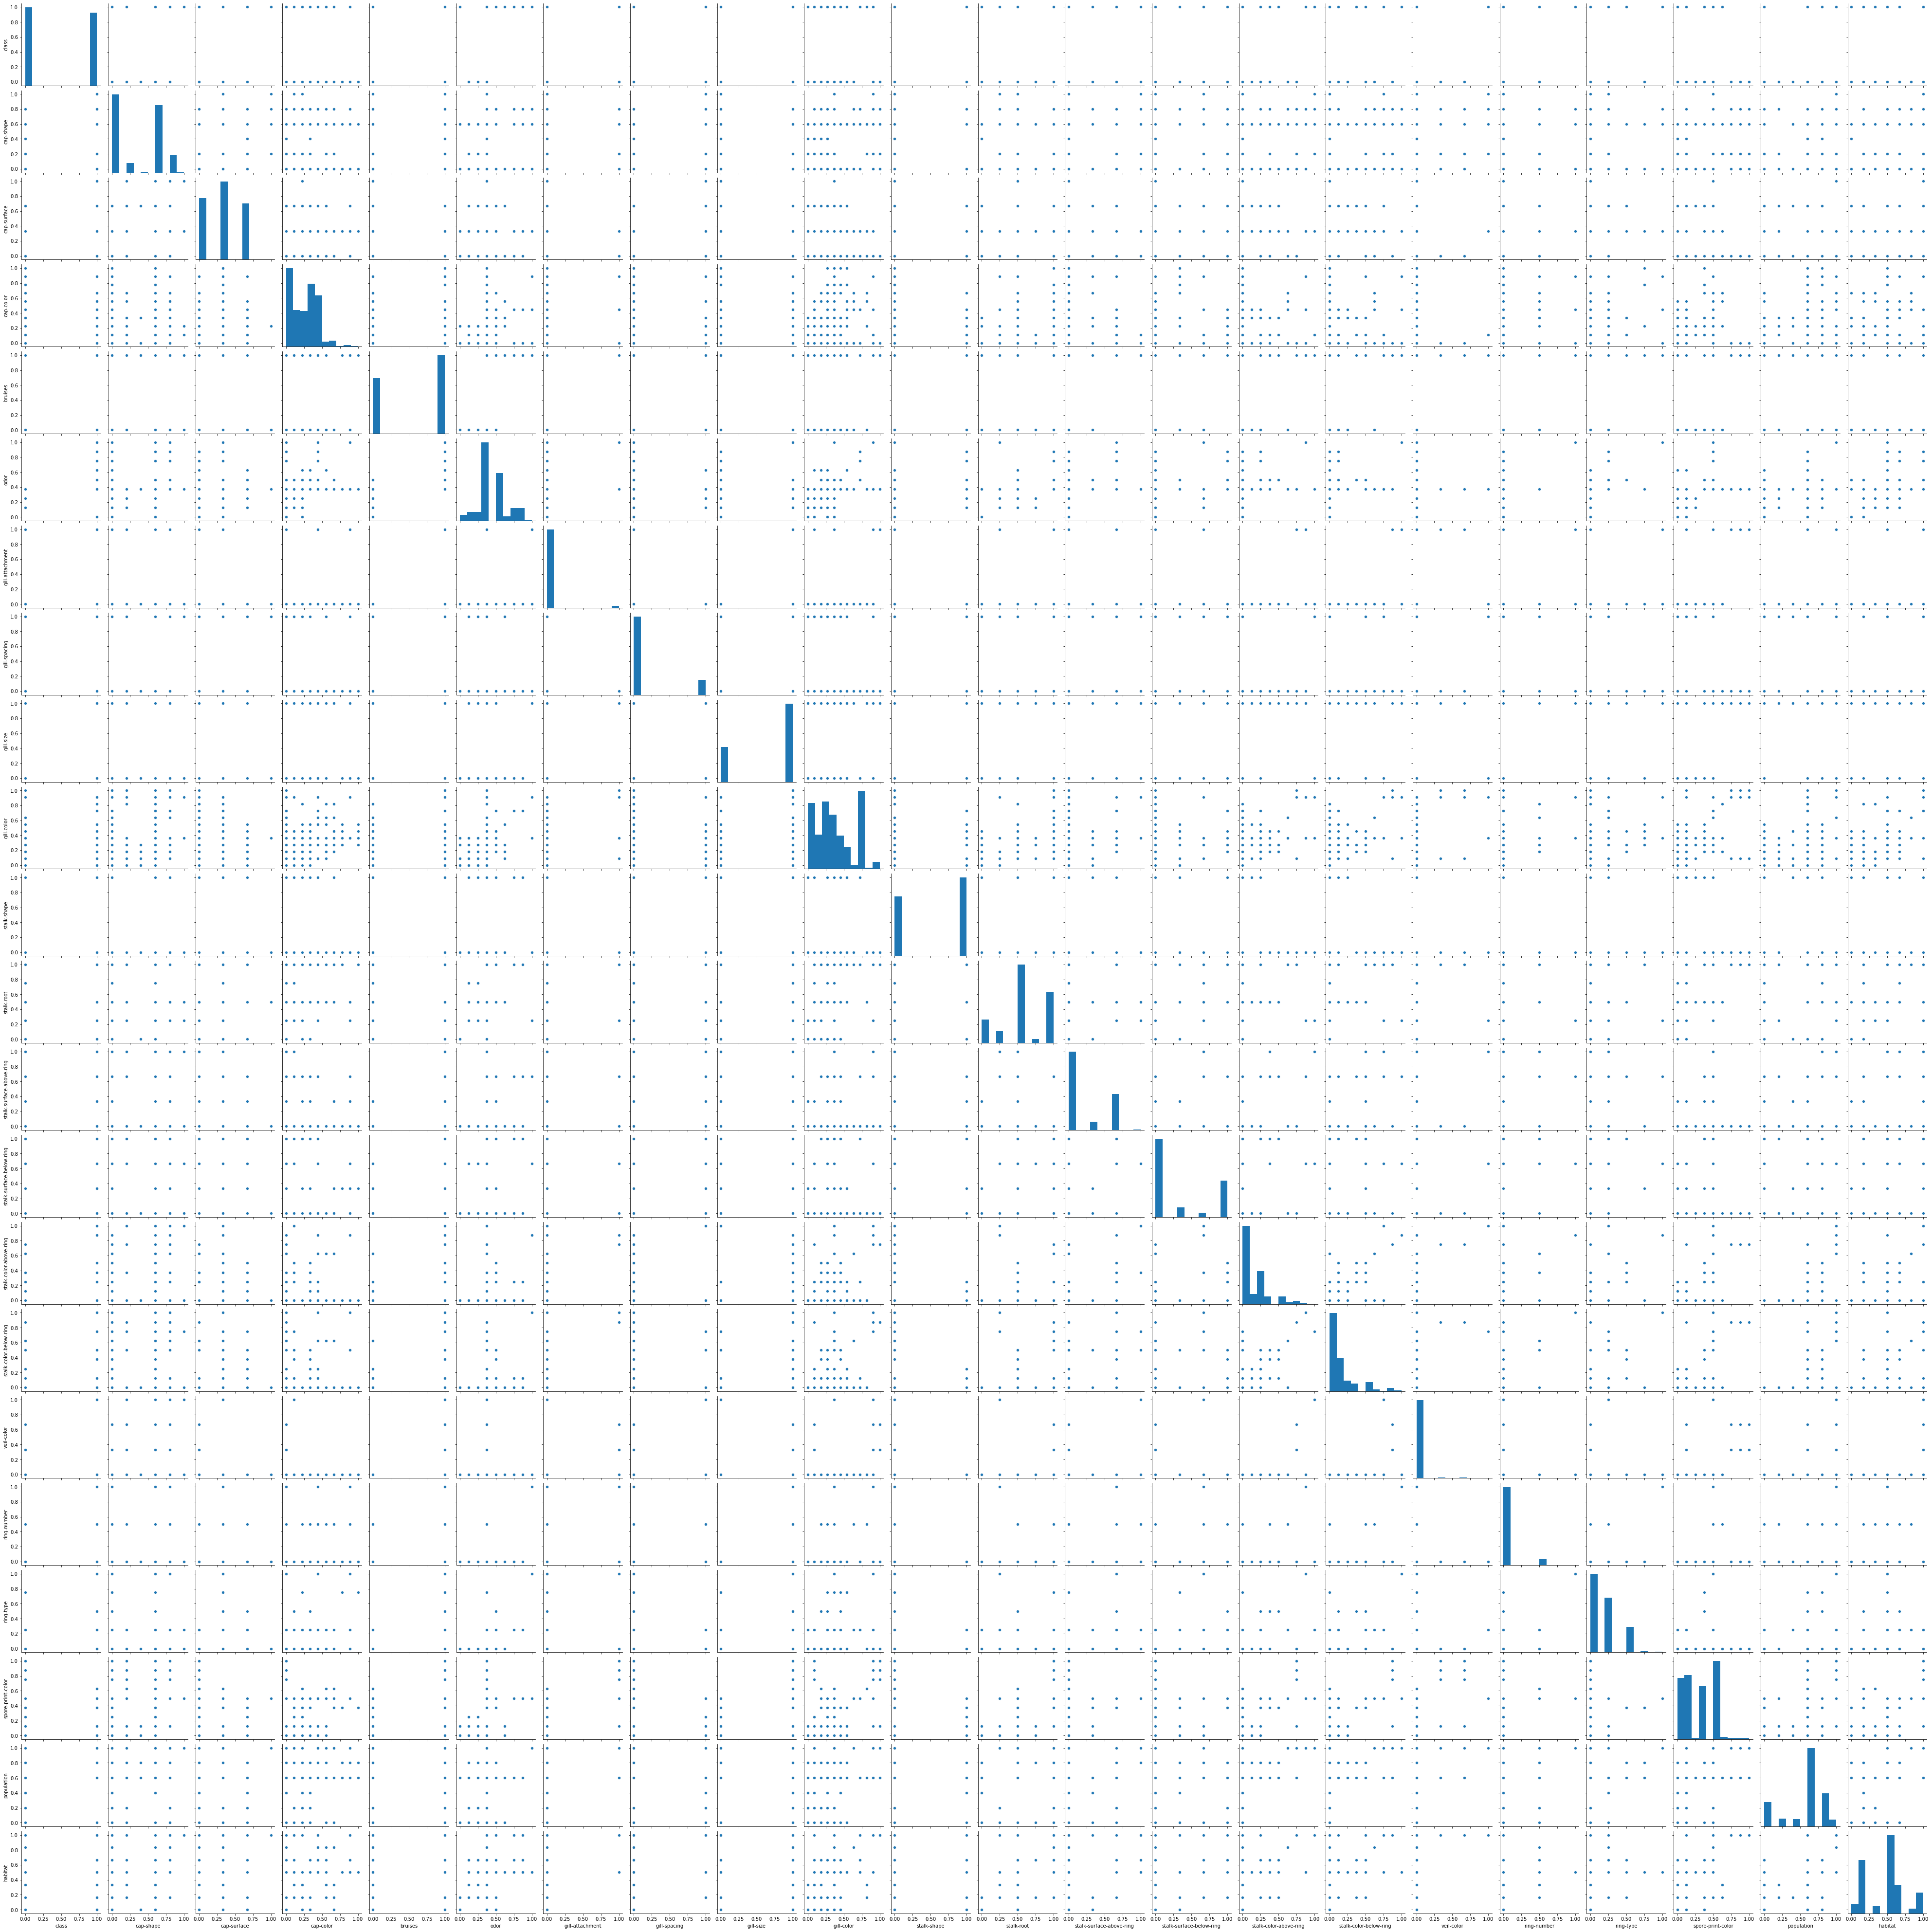

In [187]:
sns.pairplot(ms)

In [188]:
from sklearn.model_selection import train_test_split

In [189]:
y = ms["class"].values

In [190]:
y.shape

(8124,)

In [191]:
x = ms.drop(["class"], axis=1).values 

In [192]:
x.shape

(8124, 21)

In [193]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=42)

In [194]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [195]:
lg=LogisticRegression()

In [196]:
lg.fit(train_x,train_y)

LogisticRegression()

In [197]:
pred=lg.predict(test_x)
print(pred)

[0 1 1 ... 1 1 0]


In [198]:
print("accuacy_score:",accuracy_score(test_y,pred))

accuacy_score: 0.9714765100671141


In [199]:
print(confusion_matrix(test_y,pred))

[[888  41]
 [ 10 849]]


In [200]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       929
           1       0.95      0.99      0.97       859

    accuracy                           0.97      1788
   macro avg       0.97      0.97      0.97      1788
weighted avg       0.97      0.97      0.97      1788



In [201]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [202]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb = mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))


0.8873846153846154
[[805  38]
 [145 637]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       843
           1       0.94      0.81      0.87       782

    accuracy                           0.89      1625
   macro avg       0.90      0.88      0.89      1625
weighted avg       0.89      0.89      0.89      1625



In [203]:
svc = SVC(kernel='rbf')    #kernel='rbf'  ------>default
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

1.0
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [204]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

1.0
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [205]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

1.0
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [206]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=knn.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

1.0
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [207]:
ms1=pd.DataFrame(predknn)
ms1.to_csv('knn_prediction.csv')

In [212]:
 import joblib
joblib.dump(knn,'knn_mashrooms.csv')

['knn_mashrooms.csv']